In [1]:
'''
https://www.kaggle.com/code/gunesevitan/rsna-2024-lsdc-eda
'''

'\nhttps://www.kaggle.com/code/gunesevitan/rsna-2024-lsdc-eda\n'

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [118]:
from glob import glob
from tqdm import tqdm
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

competition_dataset_directory = Path('spine')

In [6]:
train_images=glob(str(competition_dataset_directory / 'train_images' / '*' / '*' / '*.dcm'))
train_images

['spine\\train_images\\100206310\\1012284084\\1.dcm',
 'spine\\train_images\\100206310\\1012284084\\10.dcm',
 'spine\\train_images\\100206310\\1012284084\\11.dcm',
 'spine\\train_images\\100206310\\1012284084\\12.dcm',
 'spine\\train_images\\100206310\\1012284084\\13.dcm',
 'spine\\train_images\\100206310\\1012284084\\14.dcm',
 'spine\\train_images\\100206310\\1012284084\\15.dcm',
 'spine\\train_images\\100206310\\1012284084\\16.dcm',
 'spine\\train_images\\100206310\\1012284084\\17.dcm',
 'spine\\train_images\\100206310\\1012284084\\18.dcm',
 'spine\\train_images\\100206310\\1012284084\\19.dcm',
 'spine\\train_images\\100206310\\1012284084\\2.dcm',
 'spine\\train_images\\100206310\\1012284084\\20.dcm',
 'spine\\train_images\\100206310\\1012284084\\21.dcm',
 'spine\\train_images\\100206310\\1012284084\\22.dcm',
 'spine\\train_images\\100206310\\1012284084\\23.dcm',
 'spine\\train_images\\100206310\\1012284084\\24.dcm',
 'spine\\train_images\\100206310\\1012284084\\25.dcm',
 'spine\\tra

In [11]:
df_train = pd.read_csv(competition_dataset_directory / 'train.csv')
df_train

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,left_neural_foraminal_narrowing_l5_s1,right_neural_foraminal_narrowing_l1_l2,right_neural_foraminal_narrowing_l2_l3,right_neural_foraminal_narrowing_l3_l4,right_neural_foraminal_narrowing_l4_l5,right_neural_foraminal_narrowing_l5_s1,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,4282019580,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate
1971,4283570761,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1972,4284048608,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild
1973,4287160193,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild


In [15]:
df_train_series_descriptions = pd.read_csv(competition_dataset_directory / 'train_series_descriptions.csv')
df_train_series_descriptions

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1
...,...,...,...
6289,4287160193,1507070277,Sagittal T2/STIR
6290,4287160193,1820446240,Axial T2
6291,4290709089,3274612423,Sagittal T2/STIR
6292,4290709089,3390218084,Axial T2


In [16]:
df_train_label_coordinates = pd.read_csv(competition_dataset_directory / 'train_label_coordinates.csv')
df_train_label_coordinates

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602
...,...,...,...,...,...,...,...
48687,4290709089,4237840455,11,Left Neural Foraminal Narrowing,L1/L2,219.465940,97.831063
48688,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L2/L3,205.340599,140.207084
48689,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L3/L4,202.724796,181.013624
48690,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L4/L5,202.933333,219.733333


In [17]:
print(f'Training Images Count {len(train_images)}')
print(f'Training Set Shape: {df_train.shape}')
print(f'Train Series Descriptions Shape: {df_train_series_descriptions.shape}')
print(f'Train Label Coordinates Shape: {df_train_label_coordinates.shape}')

Training Images Count 147218
Training Set Shape: (1975, 26)
Train Series Descriptions Shape: (6294, 3)
Train Label Coordinates Shape: (48692, 7)


In [20]:
'''
개요
문제는 아래 척추의 퇴행성 상태를 다섯 가지로 분류하는 것입니다. 
척추관 협착증, 내측 협착증, 관절하 협착증의 세 가지 핵심 조건이 있습니다. 
그중 마지막 두 가지는 척추의 각 면별로 고려되기 때문에 
좌측 신경 내부 협착증, 우측 신경 내부 협착증, 좌측 관절하 협착증, 우측 관절하 협착증, 척추관 협착증이 그 대상입니다. 
데이터 세트의 각 영상 연구에는 디스크 레벨 L1/L2, L2/L3, L3/L4, L4/L5, L5/S1에서 
이 다섯 가지 조건 각각에 대해 주어진 세 가지 심각도 점수(Normal/Mild, Moderate, Serve)가 있습니다.

디스크 레벨은 추간판이 위치한 요추의 특정 부위를 말합니다.

L1/L2 : 제1요추(L1)와 제2요추(L2) 사이의 디스크
L2/L3: 두 번째(L2)와 세 번째(L3) 요추 사이의 디스크
L3/L4: 제3요추(L3)와 제4요추(L4) 사이의 디스크
L4/L5: 제4 요추(L4)와 제5 요추(L5) 사이의 디스크
L5/S1 : 제5요추(L5)와 제1천골(S1) 사이의 디스크
이러한 수준은 척추 문제를 평가하고 분류하는 위치를 나타냅니다. 척추의 해부학은 아래에서 확인할 수 있습니다.
'''

'\n개요\n문제는 아래 척추의 퇴행성 상태를 다섯 가지로 분류하는 것입니다. \n척추관 협착증, 내측 협착증, 관절하 협착증의 세 가지 핵심 조건이 있습니다. \n그중 마지막 두 가지는 척추의 각 면별로 고려되기 때문에 \n좌측 신경 내부 협착증, 우측 신경 내부 협착증, 좌측 관절하 협착증, 우측 관절하 협착증, 척추관 협착증이 그 대상입니다. \n데이터 세트의 각 영상 연구에는 디스크 레벨 L1/L2, L2/L3, L3/L4, L4/L5, L5/S1에서 \n이 다섯 가지 조건 각각에 대해 주어진 세 가지 심각도 점수(Normal/Mild, Moderate, Serve)가 있습니다.\n\n디스크 레벨은 추간판이 위치한 요추의 특정 부위를 말합니다.\n\nL1/L2 : 제1요추(L1)와 제2요추(L2) 사이의 디스크\nL2/L3: 두 번째(L2)와 세 번째(L3) 요추 사이의 디스크\nL3/L4: 제3요추(L3)와 제4요추(L4) 사이의 디스크\nL4/L5: 제4 요추(L4)와 제5 요추(L5) 사이의 디스크\nL5/S1 : 제5요추(L5)와 제1천골(S1) 사이의 디스크\n이러한 수준은 척추 문제를 평가하고 분류하는 위치를 나타냅니다. 척추의 해부학은 아래에서 확인할 수 있습니다.\n'

In [21]:
df_train

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,left_neural_foraminal_narrowing_l5_s1,right_neural_foraminal_narrowing_l1_l2,right_neural_foraminal_narrowing_l2_l3,right_neural_foraminal_narrowing_l3_l4,right_neural_foraminal_narrowing_l4_l5,right_neural_foraminal_narrowing_l5_s1,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,4282019580,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate
1971,4283570761,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1972,4284048608,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild
1973,4287160193,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild


In [22]:
'''
조건
이미 언급했듯이 데이터셋에는 세 가지 조건이 존재합니다. 
수준 간 분포가 다를 수 있으므로 함께 분석해야 합니다.
'''

'\n조건\n이미 언급했듯이 데이터셋에는 세 가지 조건이 존재합니다. \n수준 간 분포가 다를 수 있으므로 함께 분석해야 합니다.\n'

In [115]:
def visualize_condition_counts(df, title, path=None):
    """
    train 세트의 상태 수 시각화

    매개변수
    ----------
    df: panda.DataFrame
        Counts and percentages of conditions

    title : str
        Title of the plot

    path: str, pathlib.path or none
        출력 파일의 경로(path is None인 경우 선택한 백엔드와 함께 플롯이 표시됨)
    """
    
    y = np.arange(df.shape[0] // 3)

    fig = go.Figure()

    fig.add_trace(go.Bar(
        y=y - 3,
        x=df['count'].values[0::3],
        orientation='h',
        name='Normal/Mild',
        marker=dict(color='blue'),
        text=[
            f'Normal Count: {normal_count} ({normal_percentage:.2f}%)' 
            for normal_count, normal_percentage in zip(df['count'].values[0::3], df['percentage'].values[0::3])
        ],
        hoverinfo='text'
    ))

    fig.add_trace(go.Bar(
        y=y,
        x=df['count'].values[1::3],
        orientation='h',
        name='Moderate',
        marker=dict(color='orange'),
        text=[
            f'Moderate Count: {moderate_count} ({moderate_percentage:.2f}%)'
            for moderate_count, moderate_percentage in zip(df['count'].values[1::3], df['percentage'].values[1::3])
        ],
        hoverinfo='text'
    ))

    fig.add_trace(go.Bar(
        y=y + 3,
        x=df['count'].values[2::3],
        orientation='h',
        name='Severe',
        marker=dict(color='red'),
        text=[
            f'Severe Count: {severe_count} ({severe_percentage:.2f}%)'
            for severe_count, severe_percentage in zip(df['count'].values[2::3], df['percentage'].values[2::3])
        ],
        hoverinfo='text'
    ))

    fig.update_layout(
        title=title,
        barmode='overlay',
        yaxis=dict(
            tickvals=y,
            ticktext=[
                f'{level}<br>Normal Count: {normal_count} ({normal_percentage:.2f}%)<br>Moderate Count: {moderate_count} ({moderate_percentage:.2f}%)<br>Severe Count: {severe_count} ({severe_percentage:.2f}%)' 
                for level, normal_count, normal_percentage, moderate_count, moderate_percentage, severe_count, severe_percentage in zip(
                    df['level'].values[0::3],
                    df['count'].values[0::3],
                    df['percentage'].values[0::3],
                    df['count'].values[1::3],
                    df['percentage'].values[1::3],
                    df['count'].values[2::3],
                    df['percentage'].values[2::3]
                )
            ],
            title=title
        ),
        xaxis=dict(title='Count'),
        width=600,
        height=400,
        legend=dict(font=dict(size=18))
    )

    if path is None:
        fig.show()
    else:
        fig.write_image(path)

In [27]:
'''
Spinal Canal Stenosis(척추관 협착증)

척추관은 척추의 각 부분을 관통하며 척추를 수용하는 통로입니다. 
척추관 내 공간이 좁아지면 척추와 그로부터 갈라지는 신경근을 압박할 수 있습니다. 
이렇게 좁아지면 척추나 신경을 자극하거나 압박하거나 꼬집어 허리 통증과 좌골신경통 등 
신경과 관련된 문제가 발생할 수 있습니다. 척추관이 좁아지는 이유는 다양한 질환과 부상 때문입니다. 
척추관 협착증은 누구에게나 발생할 수 있지만 50세 이상에서 가장 흔히 발생합니다.

상태는 일반적으로 척추의 두 영역에 영향을 미칩니다:

요추(요추협착증) : 요추에는 5개의 척추뼈가 있어 요추에서 가장 큰 L1~L5로 표시되어 있습니다
목(cervical spinal stenosis) : 경추는 목에 7개의 척추뼈가 있으며, C1~C7로 표시되어 있습니다
흔하지는 않지만 척추 협착증의 영향을 받을 수 있는 것이 중간 등(흉추)입니다.
'''

'\nSpinal Canal Stenosis(척추관 협착증)\n\n척추관은 척추의 각 부분을 관통하며 척추를 수용하는 통로입니다. \n척추관 내 공간이 좁아지면 척추와 그로부터 갈라지는 신경근을 압박할 수 있습니다. \n이렇게 좁아지면 척추나 신경을 자극하거나 압박하거나 꼬집어 허리 통증과 좌골신경통 등 \n신경과 관련된 문제가 발생할 수 있습니다. 척추관이 좁아지는 이유는 다양한 질환과 부상 때문입니다. \n척추관 협착증은 누구에게나 발생할 수 있지만 50세 이상에서 가장 흔히 발생합니다.\n\n상태는 일반적으로 척추의 두 영역에 영향을 미칩니다:\n\n요추(요추협착증) : 요추에는 5개의 척추뼈가 있어 요추에서 가장 큰 L1~L5로 표시되어 있습니다\n목(cervical spinal stenosis) : 경추는 목에 7개의 척추뼈가 있으며, C1~C7로 표시되어 있습니다\n흔하지는 않지만 척추 협착증의 영향을 받을 수 있는 것이 중간 등(흉추)입니다.\n'

In [34]:
spinal_canal_stenosis_columns = [column for column in df_train.columns if column.startswith('spinal_canal_stenosis')]
spinal_canal_stenosis_columns

['spinal_canal_stenosis_l1_l2',
 'spinal_canal_stenosis_l2_l3',
 'spinal_canal_stenosis_l3_l4',
 'spinal_canal_stenosis_l4_l5',
 'spinal_canal_stenosis_l5_s1']

In [52]:
df_train_spinal_canal_stenosis = []

In [53]:
for column in spinal_canal_stenosis_columns:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'spinal_canal_stenosis'})
    df_train_spinal_canal_stenosis.append(df)
    
df_train_spinal_canal_stenosis

[     spinal_canal_stenosis  level
 0              Normal/Mild  l1_l2
 1              Normal/Mild  l1_l2
 2              Normal/Mild  l1_l2
 3              Normal/Mild  l1_l2
 4              Normal/Mild  l1_l2
 ...                    ...    ...
 1970           Normal/Mild  l1_l2
 1971           Normal/Mild  l1_l2
 1972           Normal/Mild  l1_l2
 1973           Normal/Mild  l1_l2
 1974           Normal/Mild  l1_l2
 
 [1975 rows x 2 columns],
      spinal_canal_stenosis  level
 0              Normal/Mild  l2_l3
 1              Normal/Mild  l2_l3
 2              Normal/Mild  l2_l3
 3              Normal/Mild  l2_l3
 4              Normal/Mild  l2_l3
 ...                    ...    ...
 1970           Normal/Mild  l2_l3
 1971           Normal/Mild  l2_l3
 1972           Normal/Mild  l2_l3
 1973              Moderate  l2_l3
 1974           Normal/Mild  l2_l3
 
 [1975 rows x 2 columns],
      spinal_canal_stenosis  level
 0              Normal/Mild  l3_l4
 1                 Moderate  l3_l4

In [54]:
df_train_spinal_canal_stenosis = pd.concat(df_train_spinal_canal_stenosis, axis=0).reset_index(drop=True)
df_train_spinal_canal_stenosis

,spinal_canal_stenosis,level
0,Normal/Mild,l1_l2
1,Normal/Mild,l1_l2
2,Normal/Mild,l1_l2
3,Normal/Mild,l1_l2
4,Normal/Mild,l1_l2
...,...,...
9870,Normal/Mild,l5_s1
9871,Normal/Mild,l5_s1
9872,Normal/Mild,l5_s1
9873,Normal/Mild,l5_s1


In [58]:
df_train_spinal_canal_stenosis_counts = df_train_spinal_canal_stenosis.value_counts().reset_index()
df_train_spinal_canal_stenosis_counts

,spinal_canal_stenosis,level,count
0,Normal/Mild,l5_s1,1904
1,Normal/Mild,l1_l2,1886
2,Normal/Mild,l2_l3,1770
3,Normal/Mild,l3_l4,1622
4,Normal/Mild,l4_l5,1482
5,Severe,l4_l5,255
6,Moderate,l4_l5,237
7,Moderate,l3_l4,230
8,Moderate,l2_l3,151
9,Severe,l3_l4,122


In [60]:
df_train_spinal_canal_stenosis_counts['severity'] = df_train_spinal_canal_stenosis_counts['spinal_canal_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_spinal_canal_stenosis_counts

,spinal_canal_stenosis,level,count,severity
0,Normal/Mild,l5_s1,1904,0
1,Normal/Mild,l1_l2,1886,0
2,Normal/Mild,l2_l3,1770,0
3,Normal/Mild,l3_l4,1622,0
4,Normal/Mild,l4_l5,1482,0
5,Severe,l4_l5,255,2
6,Moderate,l4_l5,237,1
7,Moderate,l3_l4,230,1
8,Moderate,l2_l3,151,1
9,Severe,l3_l4,122,2


In [63]:
df_train_spinal_canal_stenosis_counts = df_train_spinal_canal_stenosis_counts.sort_values(by=['level', 'severity'], ascending=True)
df_train_spinal_canal_stenosis_counts 

,spinal_canal_stenosis,level,count,severity
1,Normal/Mild,l1_l2,1886,0
10,Moderate,l1_l2,67,1
13,Severe,l1_l2,21,2
2,Normal/Mild,l2_l3,1770,0
8,Moderate,l2_l3,151,1
11,Severe,l2_l3,53,2
3,Normal/Mild,l3_l4,1622,0
7,Moderate,l3_l4,230,1
9,Severe,l3_l4,122,2
4,Normal/Mild,l4_l5,1482,0


In [66]:
df_train_spinal_canal_stenosis_counts['percentage'] = df_train_spinal_canal_stenosis_counts['count'] / df_train_spinal_canal_stenosis_counts.groupby('level')['count'].transform('sum') * 100
df_train_spinal_canal_stenosis_counts 

,spinal_canal_stenosis,level,count,severity,percentage
1,Normal/Mild,l1_l2,1886,0,95.542047
10,Moderate,l1_l2,67,1,3.394124
13,Severe,l1_l2,21,2,1.063830
2,Normal/Mild,l2_l3,1770,0,89.665653
8,Moderate,l2_l3,151,1,7.649443
11,Severe,l2_l3,53,2,2.684904
3,Normal/Mild,l3_l4,1622,0,82.168186
7,Moderate,l3_l4,230,1,11.651469
9,Severe,l3_l4,122,2,6.180344
4,Normal/Mild,l4_l5,1482,0,75.075988


In [68]:
'''
다양한 수준 내에서 척추관 협착증의 중증도는 아래에 시각화되어 있습니다. 
moderate 및 severe 수치가 L5/S1 수치에 도달할 때까지 지속적으로 증가하기 때문에 
이 상태는 낮은 수치에서 더 흔합니다. L5/S1 수치는 moderate 및 severe 수치가 가장 낮은 반면 
L4/L5 레벨은 moderate 수치보다 severe 수치가 더 높은 유일한 레벨입니다.
'''

'\n다양한 수준 내에서 척추관 협착증의 중증도는 아래에 시각화되어 있습니다. \nmoderate 및 severe 수치가 L5/S1 수치에 도달할 때까지 지속적으로 증가하기 때문에 \n이 상태는 낮은 수치에서 더 흔합니다. L5/S1 수치는 moderate 및 severe 수치가 가장 낮은 반면 \nL4/L5 레벨은 moderate 수치보다 severe 수치가 더 높은 유일한 레벨입니다.\n'

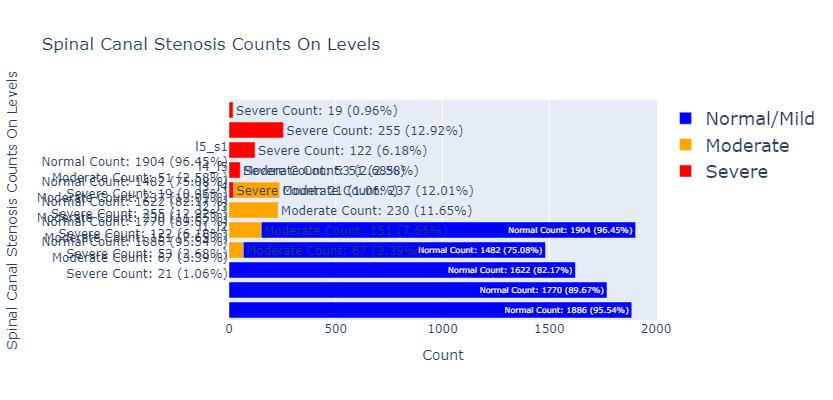

In [116]:
visualize_condition_counts(
    df=df_train_spinal_canal_stenosis_counts,
    title='Spinal Canal Stenosis Counts On Levels'
)

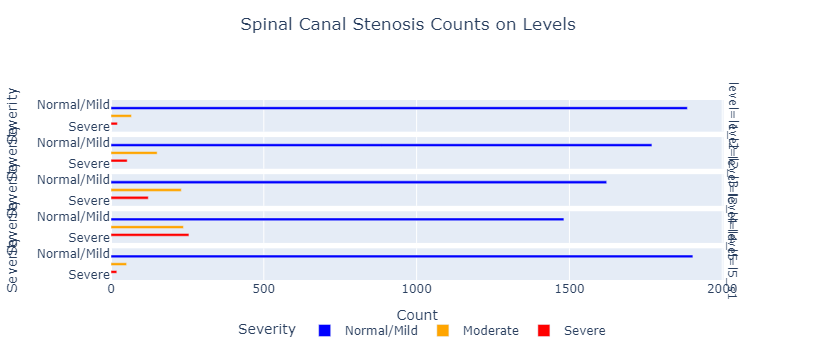

In [133]:
color_map = {
    'Normal/Mild': 'blue',
    'Moderate': 'orange',
    'Severe': 'red'
}

# 막대 그래프 생성
fig = px.bar(
    df_train_spinal_canal_stenosis_counts, 
    x='count', 
    y='spinal_canal_stenosis', 
    color='spinal_canal_stenosis',  # 색상 기준을 spinal_canal_stenosis로 설정
    facet_row='level',  # 각 level에 대해 가로로 정렬
    color_discrete_map=color_map,  # `spinal_canal_stenosis`에 따라 색상 매핑
    labels={'count':'Count', 'spinal_canal_stenosis':'Severity'},
    title='Spinal Canal Stenosis Counts on Levels'
)

# 그래프 레이아웃 조정
fig.update_layout(barmode='group',
                  legend=dict(
                    orientation="h",  # 범례를 수평으로 배치
                    yanchor="top",  # 범례의 기준을 상단에 맞춤
                    y=-0.2,  # Y축 위치 조정 (그래프의 아래쪽)
                    xanchor="center",  # 범례의 기준을 가운데에 맞춤
                    x=0.5)  # X축 위치 조정 (그래프의 가운데) 
                  ,title={
                    'x': 0.5,  # 제목을 그래프의 가로 중앙으로 설정
                    'xanchor': 'center',  # 제목을 중앙에 맞춤
                    'y': 0.95,  # 제목의 세로 위치 (그래프의 상단과 가까운 위치)
                    'yanchor': 'top',  # 제목의 상단을 기준으로 설정
                    'pad': {'b': 20}  # 제목과 그래프 사이의 거리 설정 (아래쪽 마진)
                  })

fig.show()